In [21]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [22]:
# Locating and reading cleansed dataset
DATA = "customer_segmentation_data"  # Update this with your actual data folder path
file_path = os.path.join(DATA, "df_test_normalised.csv")
df = pd.read_csv(file_path)

In [23]:
# Drop unnecessary columns (ID, names, etc.)
df = df.drop(columns=['ID', "Var_1"])

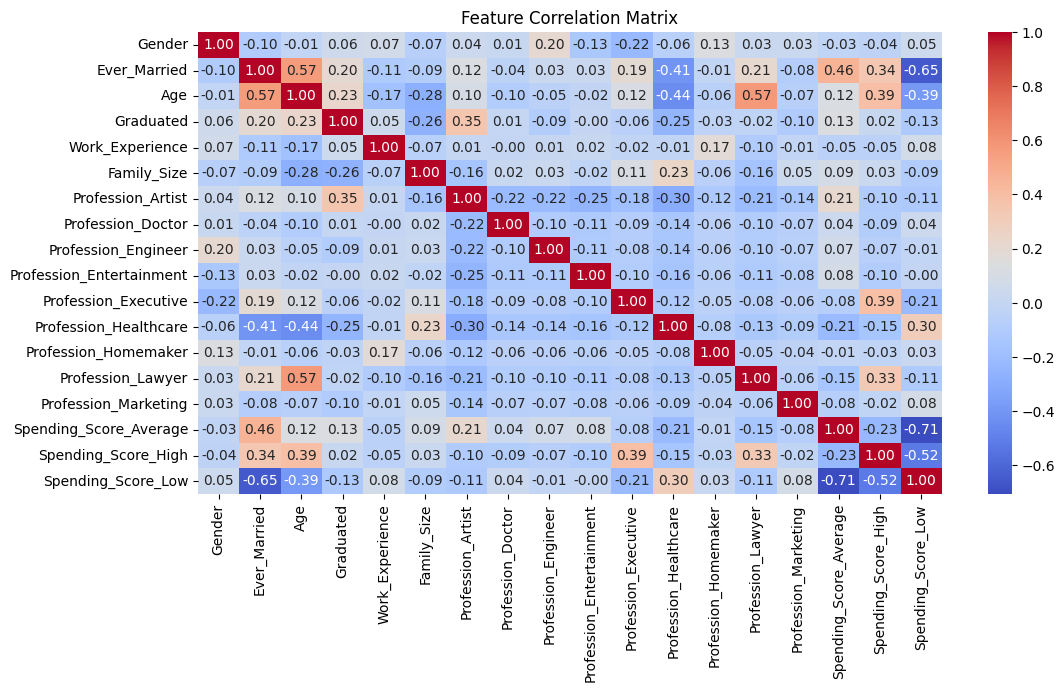

In [24]:


# Check correlation matrix to remove redundant features
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Standardize numerical features before PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)



In [25]:
# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)

# Principal components
print("Principal components:\n", pca.components_)

# Combine principal components with feature names
pca_df = pd.DataFrame(pca.components_, columns=df.columns, index=['PC1', 'PC2'])


Explained variance ratio: [0.18154989 0.10756677]
Principal components:
 [[-0.03900448  0.4582909   0.43005448  0.19084825 -0.08556164 -0.11009262
   0.13793129 -0.0463376  -0.01830954  0.00046223  0.14119243 -0.32888413
  -0.03236722  0.2132397  -0.07158803  0.25770363  0.29434171 -0.43970151]
 [ 0.16213883  0.01438197 -0.11735186  0.33756993  0.12398088 -0.17951748
   0.45596118  0.04723282  0.04274431  0.03967432 -0.35228693 -0.1857771
   0.04814896 -0.31792978 -0.07586759  0.36325052 -0.43000001 -0.00500731]]


In [26]:
pca_df

,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
PC1,-0.039004,0.458291,0.430054,0.190848,-0.085562,-0.110093,0.137931,-0.046338,-0.018310,0.000462,0.141192,-0.328884,-0.032367,0.21324,-0.071588,0.257704,0.294342,-0.439702
PC2,0.162139,0.014382,-0.117352,0.337570,0.123981,-0.179517,0.455961,0.047233,0.042744,0.039674,-0.352287,-0.185777,0.048149,-0.31793,-0.075868,0.363251,-0.430000,-0.005007


In [27]:
max_pc1 = pca_df.loc['PC1'].abs().idxmax()
max_pc2 = pca_df.loc['PC2'].abs().idxmax()

In [28]:
print(f"Feature with maximum value for PC1: {max_pc1}")
print(f"Feature with maximum value for PC2: {max_pc2}")

Feature with maximum value for PC1: Ever_Married
Feature with maximum value for PC2: Profession_Artist
